# Простейшие примеры построения описательных статистик

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn import svm, datasets 
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.DataFrame.from_csv('StatsForMajor.csv', sep = ';')

# Атрибутивный состав таблицы

In [11]:
for col in list(df):
    print col

account_id
assists
attack_type_x
camps_stacked
cluster
creeps_stacked
deaths
duration
first_blood_time
gold_per_min
gold_spent
hero_damage
hero_healing
hero_id
leagueid
leaguename
localized_name_x
match_id
player_slot
primary_attr_x
start_time
stuns
t_experience_cnt_10
t_experience_cnt_12
t_experience_cnt_15
t_experience_cnt_20
t_experience_cnt_25
t_experience_cnt_3
t_experience_cnt_30
t_experience_cnt_5
t_experience_cnt_8
t_gold_cnt_10
t_gold_cnt_12
t_gold_cnt_15
t_gold_cnt_20
t_gold_cnt_25
t_gold_cnt_3
t_gold_cnt_30
t_gold_cnt_5
t_gold_cnt_8
t_lasthits_cnt_10
t_lasthits_cnt_12
t_lasthits_cnt_15
t_lasthits_cnt_20
t_lasthits_cnt_25
t_lasthits_cnt_3
t_lasthits_cnt_30
t_lasthits_cnt_5
t_lasthits_cnt_8
team_id
tower_damage
win
xp_per_min
id_x
datetime
t_item_aether_lens
t_item_arcane_boots
t_item_black_king_bar
t_item_blade_mail
t_item_blink
t_item_boots
t_item_bottle
t_item_desolator
t_item_echo_sabre
t_item_force_staff
t_item_hand_of_midas
t_item_hurricane_pike
t_item_invis_sword
t_item

In [7]:
df.shape

(10253, 132)

In [5]:
df.head()

,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,gold_per_min,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
0,88553213,16,Ranged,0.0,224,0.0,3,2983,4,270,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
1,106809101,8,Ranged,0.0,138,0.0,5,2398,116,371,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
2,40547474,10,Ranged,2.0,224,4.0,0,1621,167,446,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
3,102525542,4,Ranged,0.0,156,0.0,12,2202,42,259,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0
4,106809101,3,Ranged,2.0,186,7.0,2,1274,163,437,...,0,1,1,Ranged,58,Enchantress,int,9.0,14.0,4.0


In [6]:
df.tail()

,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,duration,first_blood_time,gold_per_min,...,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win
141318,112377459,0,Ranged,0.0,153,0.0,3,999,160,172,...,1,0,1,Ranged,68,Ancient Apparition,int,15.0,11.0,3.0
141319,117990312,21,Ranged,2.0,224,5.0,9,3396,143,364,...,1,0,1,Ranged,68,Ancient Apparition,int,15.0,11.0,3.0
141320,129585121,4,Ranged,0.0,224,0.0,1,2997,129,625,...,0,0,0,Ranged,59,Huskar,str,10.0,5.0,4.0
141321,101450083,6,Ranged,1.0,132,2.0,5,3149,251,735,...,0,0,0,Ranged,59,Huskar,str,10.0,5.0,4.0
141322,50828662,9,Ranged,0.0,123,0.0,6,1868,200,447,...,1,0,0,Ranged,105,Techies,int,NaN,NaN,NaN


# Динамика изменения creep-stats (без разделения по ролям) по всем матчам в таблице

## Разрешение по времени (минуты): 3, 5, 8, 10, 12, 15, 20, 25, 30

8 минута

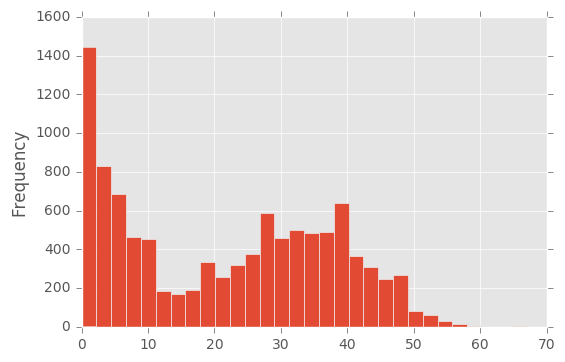

In [9]:
df['t_lasthits_cnt_8'].plot(kind = 'hist', bins = 30)

25 минута

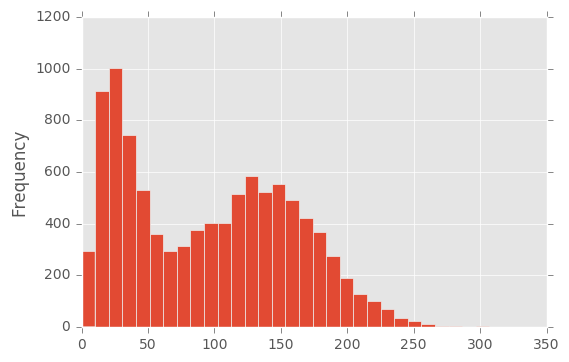

In [10]:
df['t_lasthits_cnt_25'].plot(kind = 'hist', bins = 30)

# Рассмотрим статистику добитых крипов по игроку Miracle- (account_id = 105248644)

на 3, 5, 8, 10 и 12 минутах

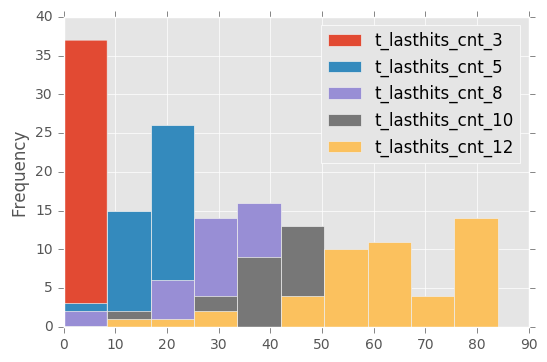

In [79]:
df.loc[df['account_id'] == 105248644, ['t_lasthits_cnt_3', 
                                       't_lasthits_cnt_5', 
                                       't_lasthits_cnt_8',
                                       't_lasthits_cnt_10',
                                       't_lasthits_cnt_12'
                                      ]].plot(kind = 'hist')

# Кол-во заработанного золота игроком Miracle-

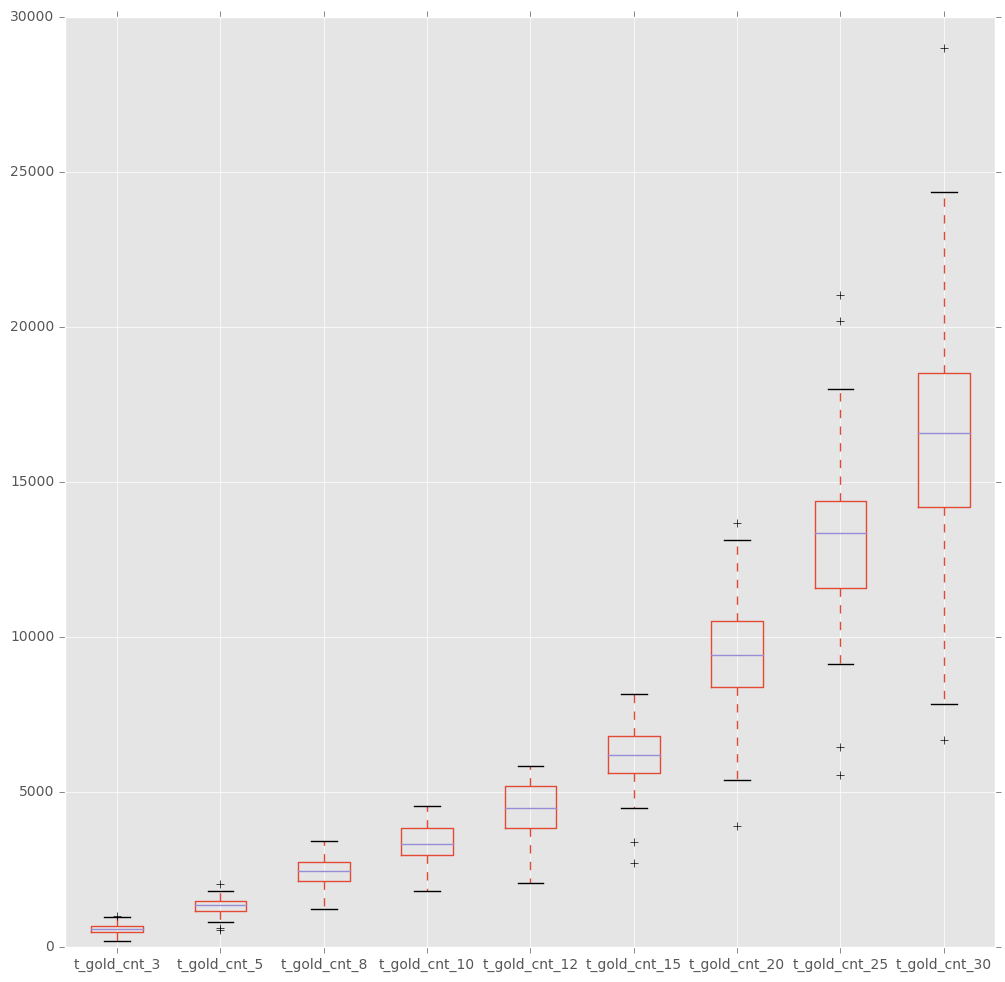

In [62]:
df.loc[df['account_id'] == 105248644,     ['t_gold_cnt_3',
                                           't_gold_cnt_5',
                                           't_gold_cnt_8',
                                           't_gold_cnt_10',
                                           't_gold_cnt_12',
                                           't_gold_cnt_15',
                                           't_gold_cnt_20',
                                           't_gold_cnt_25',
                                           't_gold_cnt_30'
                                          ]].plot(kind = 'box', figsize = (12, 12))

# Статистика только по мидерам, указанным в файле "Список игроков MID"

In [56]:
isMidder = df['account_id'].map(lambda x: x in [
                                                311360822,
                                                205813150,
                                                106573901,
                                                111620041,
                                                149486894,
                                                105248644,
                                                86700461,
                                                116585378,
                                                173880329,
                                                106863163,
                                                101586543,
                                                108484186,
                                                113457795,
                                                5150808,
                                                12231202,
                                                70388657,
                                                250114507,
                                                87586992,
                                                154715080,
                                                19757254,
                                                86799300,
                                                93119769, 
                                                ])

In [64]:
mid = df[isMidder]

# Время покупки Bottle мидерами в секундах от старта первой пачки крипов

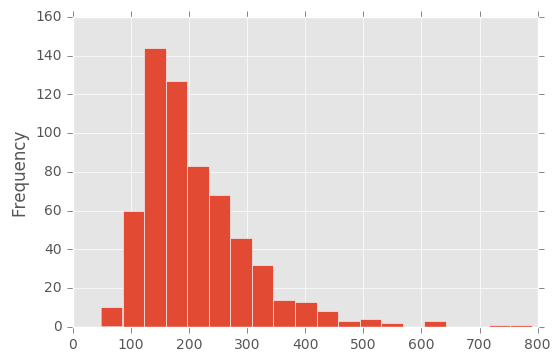

In [68]:
mid['t_item_bottle'].plot(kind = 'hist', bins = 20)

# Время покупки Bottle мидерами в минутах от старта первой пачки крипов

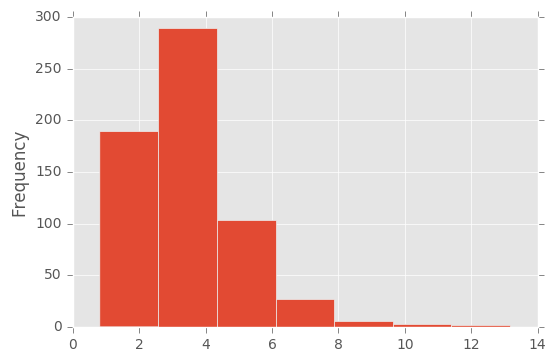

In [74]:
mid['t_item_bottle'].divide(60).plot(kind = 'hist', bins = 7)

# Время покупки Bottle игроком Miracle- в минутах

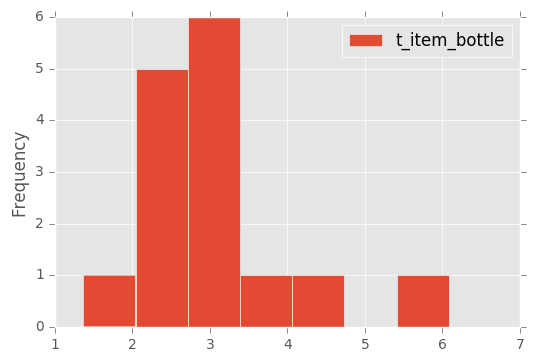

In [82]:
mid.loc[mid['account_id'] == 105248644, ['t_item_bottle']].divide(60).plot(kind = 'hist', bins = 7)